In [1]:
#CIFAR-10 dataset
#[URL] https://www.cs.toronto.edu/~kriz/cifar.html

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using TensorFlow backend.
C:\Users\1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
plt.figure(figsize=(10,10))

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
for i in range(0,40) :
    im = Image.fromarray(X_train[i])
    plt.subplot(5,8,i+1)
    plt.title(labels[y_train[i][0]])
    plt.tick_params(labelbottom="off", bottom="off")
    plt.tick_params(labelleft="off", left="off")
    plt.imshow(im)

plt.show()

C:\Users\1\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


<Figure size 1000x1000 with 40 Axes>

In [3]:
X_train.shape

(50000, 32, 32, 3)

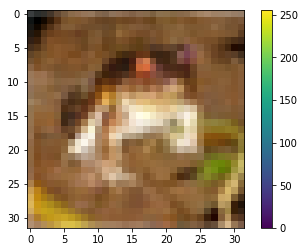

In [4]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
len(y_train)

50000

In [6]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [7]:
X_train = X_train.reshape(-1, 32*32*3)/255

In [8]:
import keras
y_train = keras.utils.to_categorical(y_train, 10)

In [9]:
X_test = X_test.reshape(-1,32*32*3)/255

In [10]:
y_test = keras.utils.to_categorical(y_test, 10)

In [11]:
from keras.models import Sequential
from keras.layers import Dense

#입력 데이터 크기 : 32*32 픽셀, RGB형 이미지 데이터 (데이터 전처리 포스팅 참고)
in_size = 32*32*3 

#출력 데이터 크기 : 10개의 카테고리
num_classes = 10

model = Sequential()
#입력층 생성
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
#출력층 생성
model.add(Dense(num_classes,activation='softmax'))

In [12]:
model.compile(
    #[1]
    loss = 'categorical_crossentropy',
    #[2]
    optimizer = 'adam',
    #[3]
    metrics = ['accuracy']
)

In [13]:
hist = model.fit(X_train, y_train,
                batch_size=32, #[1]
                epochs=50, #[2]
                verbose=1,
                validation_data=(X_test, y_test)) #[3]

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 114s 2ms/step - loss: 1.9042 - acc: 0.3313 - val_loss: 1.7208 - val_acc: 0.3819
Epoch 2/3
50000/50000 [==============================] - 127s 3ms/step - loss: 1.7042 - acc: 0.3922 - val_loss: 1.6486 - val_acc: 0.4114
Epoch 3/3
50000/50000 [==============================] - 123s 2ms/step - loss: 1.6452 - acc: 0.4126 - val_loss: 1.6271 - val_acc: 0.4182


In [14]:
score = model.evaluate(X_test, y_test, verbose=1)
print('정답률 = ', score[1],'loss=', score[0])

10000/10000 [==============================] - 2s 248us/step
정답률 =  0.4182 loss= 1.6270839000701904


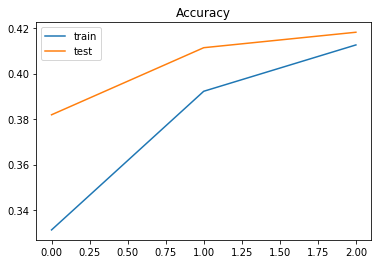

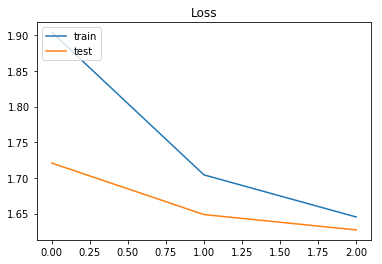

In [15]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [16]:
model.save_weights('cifar10-weight.h5')

In [17]:
import cv2
im = cv2.imread('cat.jpg')

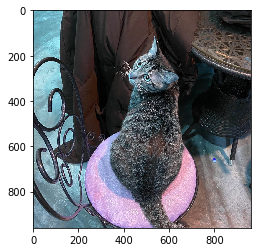

In [18]:
import matplotlib.pyplot as plt
plt.imshow(im)
plt.show()

In [19]:
import numpy as np
im = im.reshape(-1,in_size)/ 255
im

array([[0.43137255, 0.71764706, 0.79607843, ..., 0.44705882, 0.70588235,
        0.78039216],
       [0.43137255, 0.69411765, 0.77647059, ..., 0.45882353, 0.72941176,
        0.79607843],
       [0.45882353, 0.75294118, 0.80784314, ..., 0.06666667, 0.05490196,
        0.0627451 ],
       ...,
       [0.68627451, 0.55686275, 0.52156863, ..., 0.88627451, 0.83137255,
        0.83921569],
       [0.96862745, 0.89019608, 0.90980392, ..., 0.83137255, 0.74901961,
        0.76078431],
       [0.82352941, 0.7372549 , 0.74509804, ..., 0.82745098, 0.76862745,
        0.78431373]])

In [20]:
from keras.models import Sequential
from keras.layers import Dense

#입력 데이터 크기 : 32*32 픽셀, RGB형 이미지 데이터 (데이터 전처리 포스팅 참고)
in_size = 32*32*3 

#출력 데이터 크기 : 10개의 카테고리
num_classes = 10

model = Sequential()
#입력층 생성
model.add(Dense(512, activation='relu', input_shape=(in_size,)))
#출력층 생성
model.add(Dense(num_classes,activation='softmax'))

model.load_weights('cifar10-weight.h5')

labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

In [21]:
r = model.predict(im, batch_size=32, verbose=1)
r

900/900 [==============================] - 0s 291us/step


array([[0.01963815, 0.19611807, 0.00366682, ..., 0.05760366, 0.0522976 ,
        0.6291901 ],
       [0.03077387, 0.35609427, 0.0066772 , ..., 0.02947482, 0.11360974,
        0.35495272],
       [0.15479206, 0.19539952, 0.05847181, ..., 0.01987742, 0.14349191,
        0.11071172],
       ...,
       [0.23917389, 0.21510987, 0.11852499, ..., 0.01321479, 0.16185325,
        0.05182339],
       [0.1426442 , 0.47186932, 0.02115586, ..., 0.00902171, 0.13127324,
        0.18471155],
       [0.14919928, 0.5189107 , 0.00925784, ..., 0.00760382, 0.08527847,
        0.21346441]], dtype=float32)

In [23]:
res = r[0]
res

array([0.01963815, 0.19611807, 0.00366682, 0.02103613, 0.00956666,
       0.00658043, 0.0043024 , 0.05760366, 0.0522976 , 0.6291901 ],
      dtype=float32)

In [24]:
for i, acc in enumerate(res) :
    print(labels[i], "=", int(acc*100))
print("---")
print("예측한 결과 = " , labels[res.argmax()])

airplane = 1
automobile = 19
bird = 0
cat = 2
deer = 0
dog = 0
frog = 0
horse = 5
ship = 5
truck = 62
---
예측한 결과 =  truck
